In [24]:
'''g = Graph()
g.set_directed(False)
v1 = g.add_vertex(7)

pos = g.new_vertex_property("vector<double>")
pos[g.vertex(0)] = (0, 0)
pos[g.vertex(1)] = (1, 2)
pos[g.vertex(2)] = (2, 0)
pos[g.vertex(3)] = (1, -2)
pos[g.vertex(6)] = (-1, 2)
pos[g.vertex(5)] = (-2, 0)
pos[g.vertex(4)] = (-1, -2)

for i in range(6):
    g.add_edge(g.vertex(0), g.vertex(i+1))
    if i == 5:
        g.add_edge(g.vertex(6), g.vertex(1))
        break
    g.add_edge(g.vertex(i+1), g.vertex(i+2))
    

    
graph_draw(g, pos=pos, vertex_text=g.vertex_index, vertex_font_size=18,
            output_size=(200, 200), output="two-nodes.png")
'''

'g = Graph()\ng.set_directed(False)\nv1 = g.add_vertex(7)\n\npos = g.new_vertex_property("vector<double>")\npos[g.vertex(0)] = (0, 0)\npos[g.vertex(1)] = (1, 2)\npos[g.vertex(2)] = (2, 0)\npos[g.vertex(3)] = (1, -2)\npos[g.vertex(6)] = (-1, 2)\npos[g.vertex(5)] = (-2, 0)\npos[g.vertex(4)] = (-1, -2)\n\nfor i in range(6):\n    g.add_edge(g.vertex(0), g.vertex(i+1))\n    if i == 5:\n        g.add_edge(g.vertex(6), g.vertex(1))\n        break\n    g.add_edge(g.vertex(i+1), g.vertex(i+2))\n    \n\n    \ngraph_draw(g, pos=pos, vertex_text=g.vertex_index, vertex_font_size=18,\n            output_size=(200, 200), output="two-nodes.png")\n'

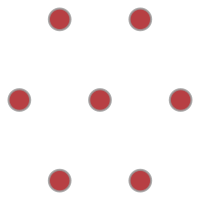

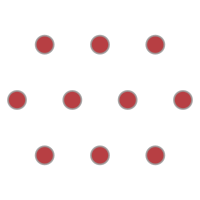

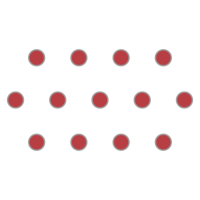

TypeError: unhashable type: 'numpy.ndarray'

In [72]:
from graph_tool.all import *
import numpy as np

d = dict()
g = Graph(directed=False)
pos = g.new_vertex_property("vector<double>")

def right(point: np.ndarray) -> np.ndarray:
    return (point + np.array([2,0]))

def left(point: np.ndarray) -> np.ndarray:
    return (point + np.array([-2,0]))

def upper_right(point: np.ndarray) -> np.ndarray:
    return (point + np.array([1,-2]))

def lower_right(point: np.ndarray) -> np.ndarray:
    return (point + np.array([1,2]))

def upper_left(point: np.ndarray) -> np.ndarray:
    return (left(upper_right(point)))

def lower_left(point: np.ndarray) -> np.ndarray:
    return (left(lower_right(point)))

def add_lattice_edges(p):
    start = d[tuple(p)]
    neighbors = g.get_out_neighbors(start)
    print(neighbors, p)
    end = 0
    try:
        end = d[tuple(right(p))]
        if(end not in neighbors):
            neighbors = np.append(neighbors, end)
            g.add_edge(g.vertex(start), g.vertex(end))
            add_lattice_edges(right(p))
    except KeyError:
        print("problemo right")
    try:
        end = d[tuple(upper_right(p))]
        if(end not in neighbors):
            neighbors = np.append(neighbors, end)
            g.add_edge(g.vertex(start), g.vertex(end))
            add_lattice_edges(upper_right(p))
    except KeyError:
        print("problemo upper_right")
    try:
        end = d[tuple(upper_left(p))]
        if(end not in neighbors):
            neighbors = np.append(neighbors, end)
            g.add_edge(g.vertex(start), g.vertex(end))
            add_lattice_edges(upper_left(p))
    except KeyError:
        print("problemo upper_left")
 #self.generateLattice()   try:
        end = d[tuple(left(p))]
        if(end not in neighbors):
            neighbors = np.append(neighbors, end)
            g.add_edge(g.vertex(start), g.vertex(end))
            add_lattice_edges(left(p))
    except KeyError:
        print("problemo left")
    neighbors = g.get_out_neighbors(start)
    try:
        end = d[tuple(lower_left(p))]
        if(end not in neighbors):
            neighbors = np.append(neighbors, end)
            g.add_edge(g.vertex(start), g.vertex(end))
            add_lattice_edges(lower_left(p))
    except KeyError:
        print("problemo lower_left")
    try:
        end = d[tuple(lower_right(p))]
        if(end not in neighbors):
            neighbors = np.append(neighbors, end)
            g.add_edge(g.vertex(start), g.vertex(end))
            add_lattice_edges(lower_right(p))
    except KeyError:
        print("problemo lower_right")

def add_to_dict(point, vertex_index):
    d[tuple(point)] = vertex_index

def add_vertex(p):
    if tuple(p) not in d:
        v = g.add_vertex()
        add_to_dict(tuple(p), v)
        pos[v] = p
        
def add_surround_vertices(p):
    add_vertex(right(p))
    add_vertex(upper_right(p))
    add_vertex(upper_left(p))
    add_vertex(left(p))
    add_vertex(lower_left(p))
    add_vertex(lower_right(p))
    
g = Graph(directed=False)
g.add_vertex(7)

pos = g.new_vertex_property("vector<double>")
orig = np.array([0.,0.])
pos[0] = orig
pos[1] = right(orig)
pos[2] = upper_right(orig)
pos[3] = upper_left(orig)
pos[4] = left(orig)
pos[5] = lower_left(orig)
pos[6] = lower_right(orig)

add_to_dict(orig, 0)
add_to_dict(right(orig), 1)
add_to_dict(upper_right(orig), 2)
add_to_dict(upper_left(orig), 3)
add_to_dict(left(orig), 4)
add_to_dict(lower_left(orig), 5)
add_to_dict(lower_right(orig), 6)

graph_draw(g, pos=pos, vertex_font_size=18,
            output_size=(200, 200), output="two-nodes.png")

add_surround_vertices(right(orig))

graph_draw(g, pos=pos, vertex_font_size=18,
            output_size=(200, 200), output="two-nodes.png")

add_surround_vertices(right(right(orig)))

graph_draw(g, pos=pos, vertex_font_size=18,
            output_size=(200, 200), output="two-nodes.png")

add_surround_vertices(upper_right(right(right(orig))))

graph_draw(g, pos=pos, vertex_font_size=18,
            output_size=(200, 200), output="two-nodes.png")
print(len(pos))